/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/yf/j9y012gd4px_17vqgfcf_kxw0000gn/T/ipykernel_65383/1125461877.py:25: RuntimeWarning: overflow encountered in square
  loss = np.mean(error ** 2)


Финальные коэффициенты: w = -73423919946262891580849946454900267252287831057148705893471625895904229740704775799339901788802693911851481841127435972372289591760301799791999034379356478912829204846200653070727212990584398453053940047019326910783977160704.0000, b = -20257986046262022173128457355712239804376964243542411685329022968849001990003227701926985959704812641568473898634394003361368348357045681270620289329629944100578520426750424760932001080810630990337432000905473069931542085632.0000


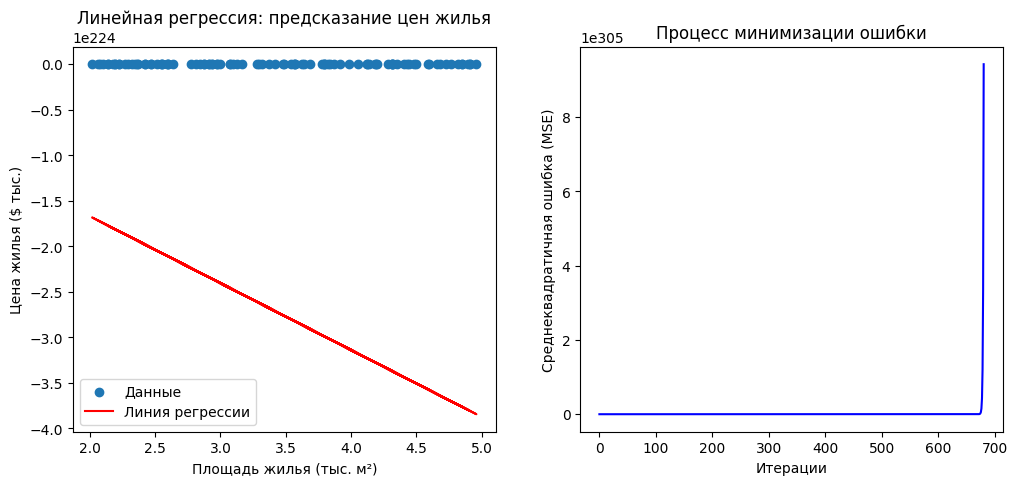

Качество модели (R^2): -inf


/var/folders/yf/j9y012gd4px_17vqgfcf_kxw0000gn/T/ipykernel_65383/1125461877.py:53: RuntimeWarning: overflow encountered in square
  ss_residual = np.sum((y_true - y_pred) ** 2)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация синтетических данных (площадь -> цена)
np.random.seed(42)
X = 2 + 3 * np.random.rand(100, 1)  # Площадь (100 объектов)
y = 5 + 4 * X + np.random.randn(100, 1) * 0.5  # Цена с шумом

# Добавление столбца единиц для смещения (bias)
X_b = np.c_[np.ones((100, 1)), X]

# Инициализация параметров
w = np.random.randn(2, 1)  # [b, w]
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)

# Градиентный спуск
losses = []
for iteration in range(n_iterations):
    y_pred = X_b.dot(w)
    error = y_pred - y
    gradients = (2 / m) * X_b.T.dot(error)
    w -= learning_rate * gradients
    loss = np.mean(error ** 2)
    losses.append(loss)

# Финальные параметры
b_final, w_final = w.flatten()
print(f"Финальные коэффициенты: w = {w_final:.4f}, b = {b_final:.4f}")

# Визуализация процесса обучения
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, label="Данные")
plt.plot(X, w_final * X + b_final, color='red', label="Линия регрессии")
plt.xlabel("Площадь жилья (тыс. м²)")
plt.ylabel("Цена жилья ($ тыс.)")
plt.legend()
plt.title("Линейная регрессия: предсказание цен жилья")

# График ошибки (MSE)
plt.subplot(1, 2, 2)
plt.plot(range(n_iterations), losses, color='blue')
plt.xlabel("Итерации")
plt.ylabel("Среднеквадратичная ошибка (MSE)")
plt.title("Процесс минимизации ошибки")
plt.show()

# Оценка качества модели (R^2)
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

r2 = r2_score(y, X_b.dot(w))
print(f"Качество модели (R^2): {r2:.4f}")
